# K-Means Clustering Assignments

**Student ID:** 63130500042

**Student Name:** Songglod Petchamras

In [198]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [199]:
class KMeansPlot:
    def __init__(self, data: pd.DataFrame, width: int, height: int):
        self.data = data
        self.fig_size = (width, height)
    
    def set_fig_size(self, width: int, height: int) -> None:
        self.fig_size = (width, height)
    
    def plot_data(self, x_axis: str, y_axis: str) -> None:
        plt.figure(figsize = self.fig_size)
        plt.scatter(data = self.data, x = x_axis, y = y_axis, s = 10)
        plt.title("Data")
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.show()

    def plot_kmeans_score(self, range_n_clusters: Union[list, range], kmeans_scores: list, score_type: str) -> None:
        plt.figure(figsize = self.fig_size)
        plt.plot(range_n_clusters, kmeans_scores, marker = "o")
        plt.xlabel("Number of Clusters")
        if score_type == "inertia":
            plt.title("Inertia vs Number of Clusters")
            plt.ylabel("Inertia")
        elif score_type == "silhouette":
            plt.title("Silhouette Coefficient vs Number of Clusters")
            plt.ylabel("Silhouette Coefficient")
        plt.grid(True)
        plt.show()
        
    def plot_optimal_clusters(self, df: pd.DataFrame, x_axis: str, y_axis: str, kmeans_details: dict) -> None:
        optimal_kmeans = kmeans_details["optimal_kmeans"]
        optimal_n_clusters = kmeans_details["optimal_n_clusters"]
        optimal_cluster_labels = kmeans_details["optimal_cluster_labels"]
        
        plt.scatter(data = df, x = x_axis, y = y_axis, c = optimal_cluster_labels, s = 10)
        plt.scatter(x = optimal_kmeans.cluster_centers_[:, 0], y = optimal_kmeans.cluster_centers_[:, 1], marker = "X", s = 20, c = "red", label = "Centroids")
        plt.title(f"Optimal Clustering with {optimal_n_clusters} Clusters")
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.show()

In [200]:
class KMeansClustering:
    def __init__(self, data: pd.DataFrame):
        self.data = data
        self.random_state = 0

    def get_kmeans(self, n_clusters: int, n_init: int = 10) -> KMeans:
        kmeans = KMeans(n_clusters = n_clusters, random_state = self.random_state, n_init = n_init)
        return kmeans

    def get_silhouette_scores(self, range_n_clusters: Union[list, range]) -> dict:
        silhouette_scores = []

        for n_clusters in range_n_clusters:
            kmeans = self.get_kmeans(n_clusters)
            cluster_labels = kmeans.fit_predict(self.data)

            silhouette_avg = silhouette_score(self.data, cluster_labels)
            silhouette_scores.append(silhouette_avg)
        
        optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
        optimal_kmeans = self.get_kmeans(optimal_n_clusters)
        optimal_cluster_labels = optimal_kmeans.fit_predict(self.data)
        kmeans_details = {
            "range_n_clusters": range_n_clusters,
            "silhouette_scores": silhouette_scores,
            "optimal_kmeans": optimal_kmeans,
            "optimal_n_clusters": optimal_n_clusters,
            "optimal_cluster_labels": optimal_cluster_labels
        }
        print(f"Optimal number of clusters: {optimal_n_clusters}")
        print(f"Silhouette Coefficient: {silhouette_scores[np.argmax(silhouette_scores)]:.2f}")
        return kmeans_details
    
    def get_inertia_scores(self, range_n_clusters: Union[list, range]) -> dict:
        inertia_scores = []

        for n_clusters in range_n_clusters:
            kmeans = self.get_kmeans(n_clusters)
            kmeans.fit(self.data)
            inertia_scores.append(kmeans.inertia_)
            print(f"Number of clusters: {n_clusters} -> {kmeans.inertia_:.2f}")
        
        kmeans_details = {
            "range_n_clusters": range_n_clusters,
            "inertia_scores": inertia_scores
        }
        return kmeans_details

    def get_kmeans_details(self, range_n_clusters: Union[list, range], score_type: str) -> dict:
        if score_type == "silhouette":
            kmeans_details = self.get_silhouette_scores(range_n_clusters)
        elif score_type == "inertia":
            kmeans_details = self.get_inertia_scores(range_n_clusters)
        else:
            raise ValueError("Invalid score type. Please choose silhouette or inertia.")
        return kmeans_details

In [201]:
N_CLUSTERS = 4
N_SAMPLES = 1000
N_FEATURES = 2

---

## Assignment 1: Clustering Synthetic Data 2D Using Silhouette Coefficient

### Objective:
Understand the concept of K-means clustering and determine the optimal number of clusters using the Silhouette Coefficient.

### Tasks:
1. Generate a synthetic 2D dataset with 4-5 distinct clusters using libraries like `sklearn.datasets.make_blobs`.
2. Visualize the dataset using a scatter plot.
3. Implement K-means clustering for a range of cluster numbers (e.g., 2 to 10).
4. For each cluster number, compute the Silhouette Coefficient.
5. Plot the Silhouette Coefficient values against the number of clusters to visualize the optimal number of clusters.
6. Visualize the clusters for the optimal number of clusters using a scatter plot.
7. Write a brief report discussing your findings.

---

In [202]:
X, y = make_blobs(n_samples = N_SAMPLES, n_features = N_FEATURES, centers = N_CLUSTERS, random_state = 0)
col_names = ["x", "y"]
df_task1 = pd.DataFrame(X, columns = col_names)
df_task1.sample(10)

,x,y
992,-0.473233,8.268298
649,-0.339637,3.842203
484,0.031556,6.949494
907,0.622276,2.928836
321,0.904864,8.303765
924,1.153696,3.902006
332,-1.744051,9.052038
229,-1.208184,7.507705
845,1.289565,1.453451
526,-0.428600,2.780043


In [203]:
plot_task1 = KMeansPlot(df_task1, width = 6, height = 4)
kmeans_task1 = KMeansClustering(df_task1)

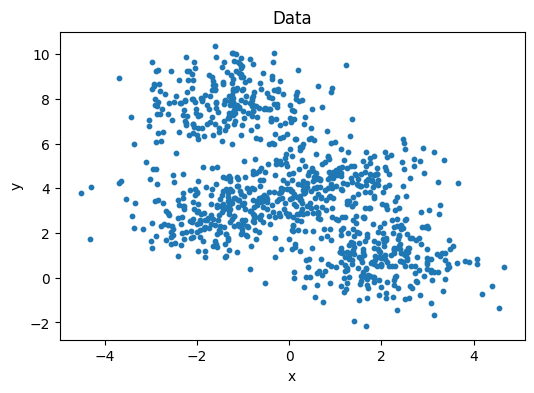

In [204]:
plot_task1.plot_data(x_axis = "x", y_axis = "y")

In [205]:
silhouette_kmeans = kmeans_task1.get_kmeans_details(range(2, 11), "silhouette")

Optimal number of clusters: 4
Silhouette Coefficient: 0.50


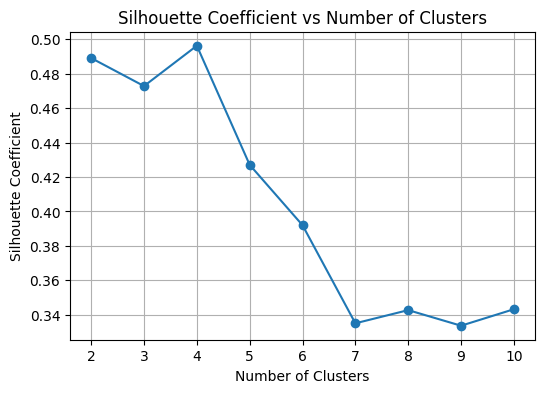

In [206]:
range_n_clusters = silhouette_kmeans["range_n_clusters"]
silhouette_scores = silhouette_kmeans["silhouette_scores"]
plot_task1.plot_kmeans_score(range_n_clusters, silhouette_scores, "silhouette")

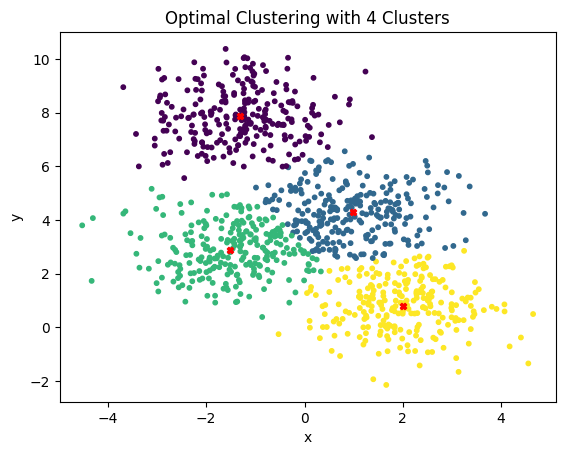

In [207]:
plot_task1.plot_optimal_clusters(df_task1, "x", "y", silhouette_kmeans)

### Description Task 1
ข้อมูลทั้งหมด 1000 จุด แบ่งเป็น 4 กลุ่ม โดยใช้คำสั่ง make_blobs ใน sklearn.datasets
จากการแบ่ง cluster ตั้งแต่ 2 ถึง 10 กลุ่มและวัดผลด้วย silhouette_score ผลลัพธ์คือได้ค่าที่มากที่สุดคือ ~ 0.49 ที่ cluster = 4


## Assignment 2: Clustering Synthetic Data 2D Using Inertia

### Objective:
Understand the concept of K-means clustering and determine the optimal number of clusters using inertia.

### Tasks:
1. Generate a synthetic 2D dataset with 4-5 distinct clusters using libraries like `sklearn.datasets.make_blobs`.
2. Visualize the dataset using a scatter plot.
3. Implement K-means clustering for a range of cluster numbers (e.g., 2 to 10).
4. For each cluster number, compute the inertia.
5. Plot the inertia values against the number of clusters to visualize the "elbow" point.
6. Visualize the clusters for the optimal number of clusters using a scatter plot.
7. Write a brief report discussing your findings.

---

In [208]:
X, y = make_blobs(n_samples = N_SAMPLES, n_features = N_FEATURES, centers = N_CLUSTERS, random_state = 1)
col_names = ["x", "y"]
df_task2 = pd.DataFrame(X, columns = col_names)
df_task2.sample(10)

,x,y
116,-2.858828,5.269835
793,-7.987960,-8.283423
809,-0.788590,3.898033
810,-6.221013,-3.548367
438,-5.889637,-7.033329
314,-5.745156,-7.239277
739,-5.920135,-3.884851
857,-0.208131,3.788453
13,-1.637697,3.937816
23,-0.512660,4.356787


In [209]:
plot_task2 = KMeansPlot(df_task2, width = 6, height = 4)
kmeans_task2 = KMeansClustering(df_task2)

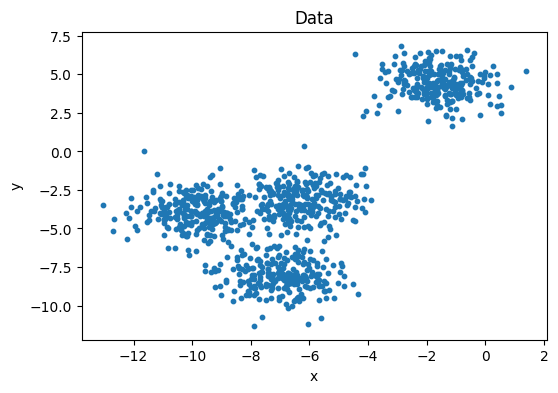

In [210]:
plot_task2.plot_data(x_axis = "x", y_axis = "y")

In [211]:
inertia_kmeans = kmeans_task2.get_kmeans_details(range(2, 11), "inertia")

Number of clusters: 2 -> 7397.49
Number of clusters: 3 -> 3758.05
Number of clusters: 4 -> 1973.03
Number of clusters: 5 -> 1784.19
Number of clusters: 6 -> 1604.09
Number of clusters: 7 -> 1436.41
Number of clusters: 8 -> 1284.15
Number of clusters: 9 -> 1153.51
Number of clusters: 10 -> 1052.26


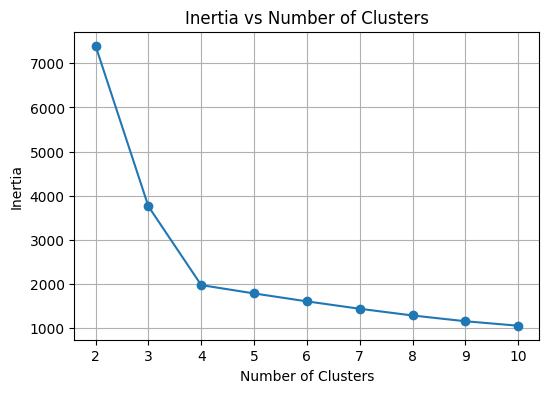

In [212]:
range_n_clusters = inertia_kmeans["range_n_clusters"]
inertia_scores = inertia_kmeans["inertia_scores"]
plot_task2.plot_kmeans_score(range_n_clusters, inertia_scores, "inertia")

In [213]:
optimal_n_clusters = 4 # elbow point
optimal_kmeans = kmeans_task2.get_kmeans(optimal_n_clusters)
optimal_cluster_labels = optimal_kmeans.fit_predict(df_task2)

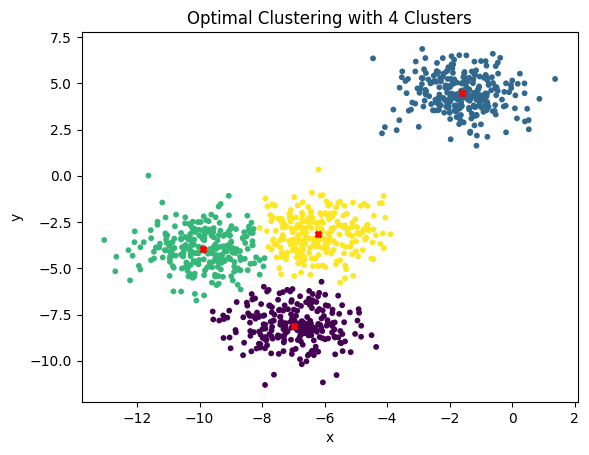

In [214]:
optimal_inertia_details = {
    "optimal_kmeans": optimal_kmeans,
    "optimal_n_clusters": optimal_n_clusters,
    "optimal_cluster_labels": optimal_cluster_labels
}
plot_task1.plot_optimal_clusters(df_task2, "x", "y", optimal_inertia_details)

### Description Task 2
ข้อมูลทั้งหมด 1000 จุด แบ่งเป็น 4 กลุ่ม โดยใช้คำสั่ง make_blobs ใน sklearn.datasets ซึ่งชุดข้อมูลจะแตกต่างจาก task 1 จากการแบ่ง cluster ตั้งแต่ 2 ถึง 10 กลุ่มและวัดผลด้วย inertia พบว่า ค่า inertia ที่เหมาะสมที่สุดที่เป็นจุด elbow point นั้นคือจุดที่ cluster = 4 

## Assignment 3: Segmenting Patients

### Objective:
Segment patients based on selected health metrics.

### Dataset Suggestion:
Diabetes dataset from UCI Machine Learning Repository.

### Tasks:
1. Load the diabetes dataset.
2. Perform exploratory data analysis to understand the features and distributions.
3. Select two features that seem most relevant or interesting for clustering (e.g., glucose levels and age).
4. Visualize the selected features using a scatter plot.
5. Implement K-means clustering for a range of cluster numbers.
6. Determine the optimal number of clusters using either the Silhouette Coefficient or inertia.
7. Visualize the clusters using a scatter plot.
8. Analyze the characteristics of each cluster to understand the segmentation.
9. Write a report discussing the patient segments based on the selected features, potential implications, or uses of these segments in healthcare.

---

In [215]:
from sklearn.datasets import load_diabetes

In [216]:
diabetes = load_diabetes(as_frame = True)

In [217]:
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [218]:
diabetes_df = diabetes["data"]

#### EDA & Visualization

In [219]:
diabetes_df.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
275,-0.005515,0.050680,-0.011595,0.011544,-0.022208,-0.015406,-0.021311,-0.002592,0.011011,0.069338
336,-0.020045,-0.044642,0.085408,-0.036656,0.091996,0.089499,-0.061809,0.145012,0.080946,0.052770
352,0.012648,0.050680,-0.071952,-0.046985,-0.051103,-0.097137,0.118591,-0.076395,-0.020292,-0.038357
44,0.045341,0.050680,0.068163,0.008101,-0.016704,0.004636,-0.076536,0.071210,0.032432,-0.017646
396,-0.085430,0.050680,-0.030996,-0.022885,-0.063487,-0.054236,0.019187,-0.039493,-0.096435,-0.034215
355,-0.074533,0.050680,-0.009439,0.014987,-0.037344,-0.021669,-0.013948,-0.002592,-0.033246,0.011349
71,-0.001882,-0.044642,0.033673,0.125158,0.024574,0.026243,-0.010266,-0.002592,0.026717,0.061054
264,0.034443,0.050680,0.028284,-0.033213,-0.045599,-0.009769,-0.050764,-0.002592,-0.059471,-0.021788
344,-0.107226,-0.044642,-0.011595,-0.040099,0.049341,0.064447,-0.013948,0.034309,0.007027,-0.030072
278,0.067136,0.050680,-0.036385,-0.084856,-0.007073,0.019667,-0.054446,0.034309,0.001148,0.032059


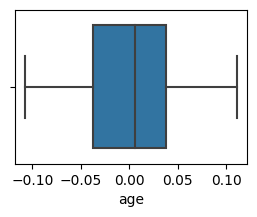

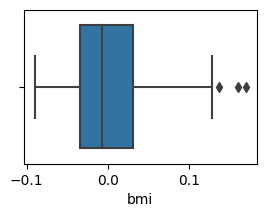

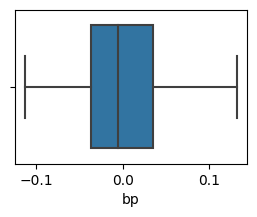

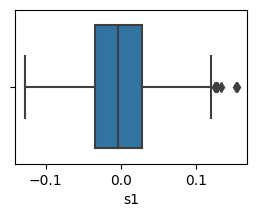

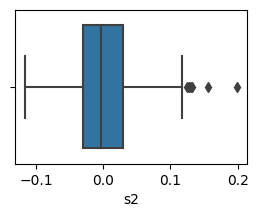

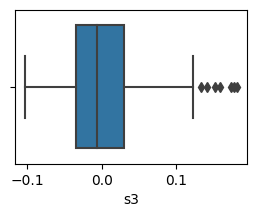

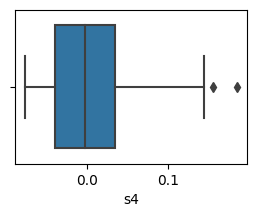

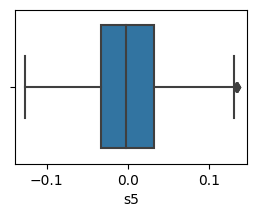

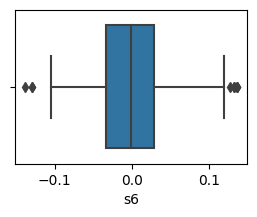

In [220]:
for col in diabetes_df.columns:
    if col != "sex":
        plt.figure(figsize = (3, 2))
        sns.boxplot(x = diabetes_df[col])
        plt.show()

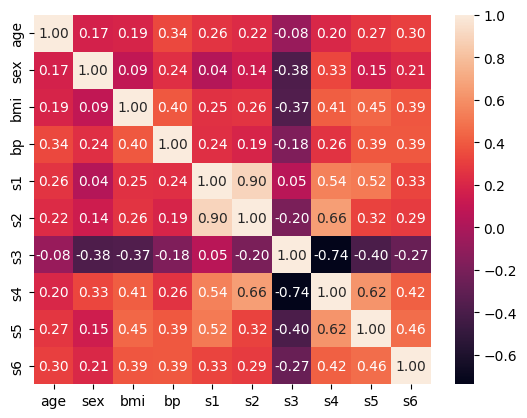

In [221]:
sns.heatmap(data = diabetes_df.corr(), annot = True, fmt = ".2f")
plt.show()

#### Model Training

In [222]:
score_type = "silhouette"

In [223]:
diabetes_features = ["bmi", "s6"]
X = diabetes_df[diabetes_features]

In [224]:
kmeans_diabetes = KMeansClustering(X)
plot_diabetes = KMeansPlot(X, width = 6, height = 4)

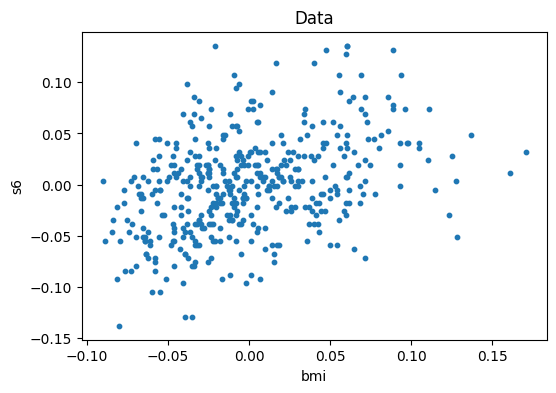

In [225]:
plot_diabetes.plot_data(*diabetes_features)

Optimal number of clusters: 2
Silhouette Coefficient: 0.38


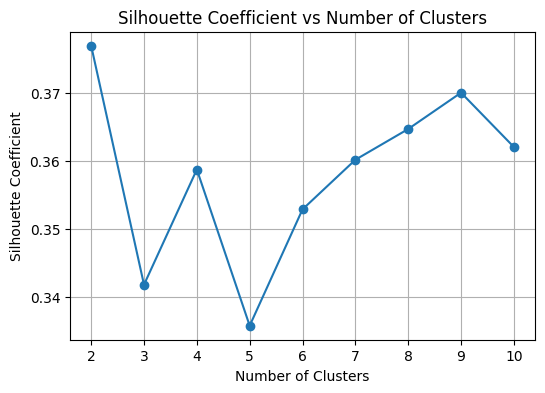

In [226]:
silhouette_kmeans_diabetes = kmeans_diabetes.get_kmeans_details(range(2, 11), score_type)

range_n_clusters = silhouette_kmeans_diabetes["range_n_clusters"]
silhouette_scores = silhouette_kmeans_diabetes["silhouette_scores"]
plot_diabetes.plot_kmeans_score(range_n_clusters, silhouette_scores, score_type)

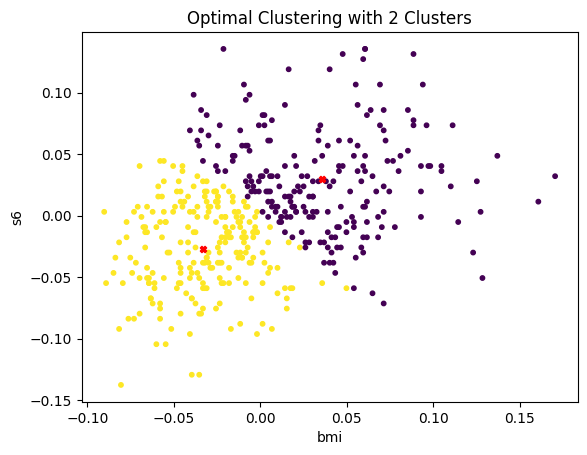

In [227]:
plot_diabetes.plot_optimal_clusters(X, *diabetes_features, silhouette_kmeans_diabetes)

##### References
- https://www.medparkhospital.com/disease-and-treatment/diabetes-mellitus

### Description Task 3
จากข้อมูลอ้างอิงที่ผมหามานั้น ผมได้เลือกใช้ข้อมูลที่เกี่ยวข้องกับโรคเบาหวาน คือ ค่า blood sugar level และค่า BMI ซึ่งเป็นค่าที่สามารถวัดได้ง่าย และเป็นค่าที่สามารถใช้วิเคราะห์ได้ง่ายในการคาดเดาความเสี่ยงต่อการเป็นเบาหวาน จากนั้นทำการทดสอบโมเดล K-Means โดยใช้ค่า K ตั้งแต่ 2 ถึง 10 และวัดผลด้วย silhouette_score พบว่า silhouette_score ที่เหมาะสมที่สุดคือ ~ 0.38 ที่ cluster = 2 จากนั้นทำการวิเคราะห์ผลลัพธ์จากโมเดลที่ได้ พบว่า ผู้ป่วยที่มีค่า blood sugar level และค่า BMI สูง จะมีความเสี่ยงต่อการเป็นโรคเบาหวานสูง และผู้ป่วยที่มีค่า blood sugar level และค่า BMI ต่ำ จะมีความเสี่ยงต่อการเป็นโรคเบาหวานต่ำ และผู้ป่วยที่มีค่า blood sugar level สูง แต่ค่า BMI ต่ำ จะมีความ เสี่ยงต่อการเป็นโรคเบาหวานสูง และผู้ป่วยที่มีค่า blood sugar level ต่ำ แต่ค่า BMI สูง จะมีความเสี่ยงต่อการเป็นโรคเบาหวานต่ำ

## Assignment 4: Clustering Penguins and Evaluating with External Measure

### Objective:
Cluster the penguin dataset and evaluate the clustering results using an external measure.

### Dataset:
Palmer Penguins dataset, available in the `seaborn` library or on GitHub.

### Tasks:
1. Load the Palmer Penguins dataset.
2. Perform exploratory data analysis to understand the features and distributions.
3. Preprocess the data: handle missing values, encode categorical variables, and normalize the data.
4. Implement K-means clustering.
5. Determine the optimal number of clusters using either the Silhouette Coefficient or inertia.
6. Visualize the clusters using appropriate visualization techniques.
7. Use an external measure (e.g., Adjusted Rand Index, Normalized Mutual Information) to evaluate the clustering results against the true species labels.
8. Write a report discussing your findings, the effectiveness of the clustering, and the evaluation results using the external measure.

#### Inspect the Data

In [228]:
penguins_df = sns.load_dataset("penguins")

In [229]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [230]:
penguins_df.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
94,Adelie,Dream,36.2,17.3,187.0,3300.0,Female
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,Male
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
167,Chinstrap,Dream,50.5,19.6,201.0,4050.0,Male
268,Gentoo,Biscoe,44.9,13.3,213.0,5100.0,Female


In [231]:
penguins_df.describe(include = "all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [232]:
penguins_df.isnull().sum()[penguins_df.isnull().sum() > 0]

bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [233]:
penguins_df.loc[penguins_df.isnull().any(axis = 1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [234]:
penguins_df.duplicated().sum()

0

#### EDA & Visualization

In [235]:
FIG_SIZE = (3, 2)

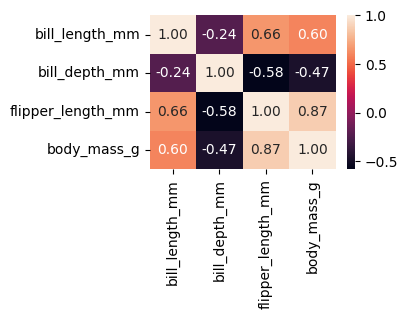

In [236]:
plt.figure(figsize = FIG_SIZE)
sns.heatmap(data = penguins_df.select_dtypes(include = ["number"]).corr(), annot = True, fmt = ".2f")
plt.show()

c:\Users\tsong\miniconda3\envs\int421\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


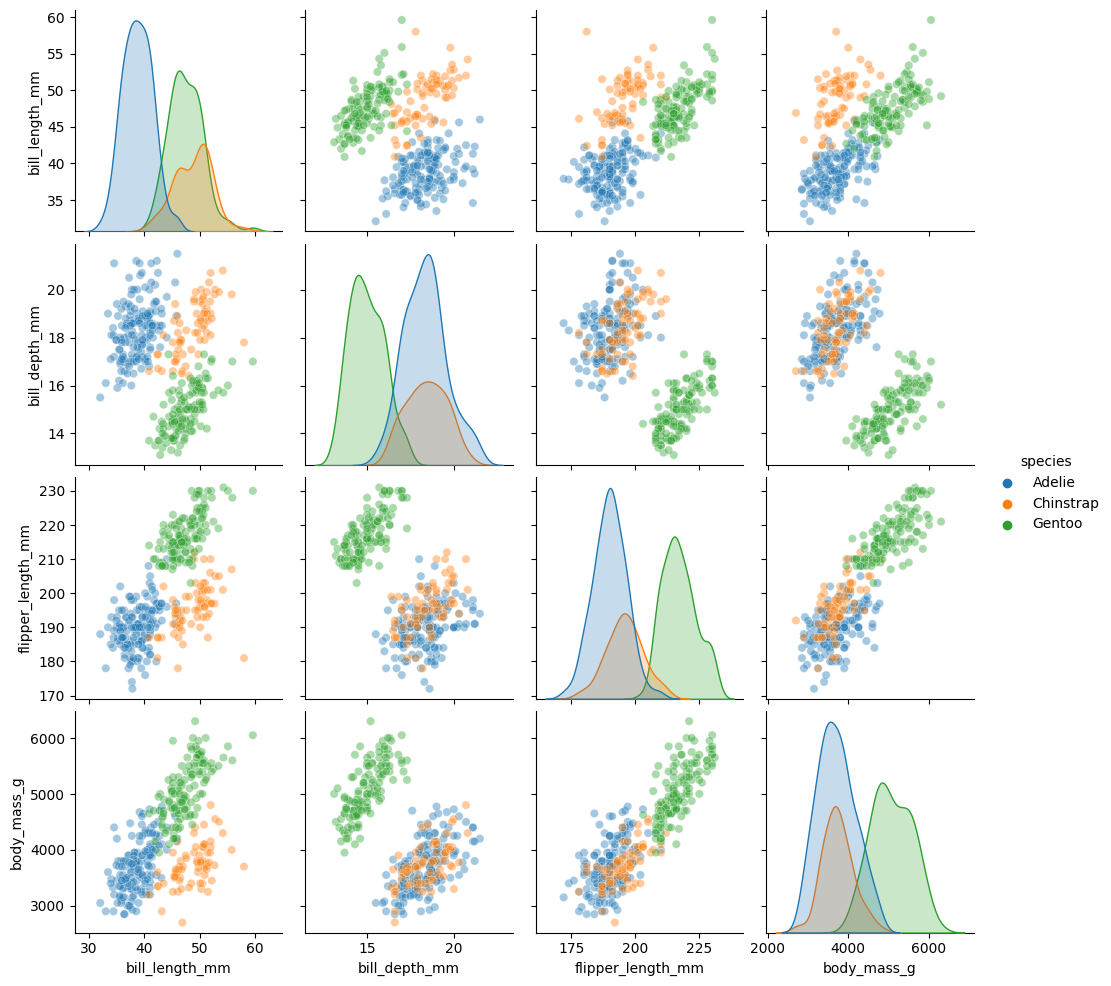

In [237]:
sns.pairplot(data = penguins_df, hue = "species", plot_kws = {"alpha": 0.4})
plt.show()

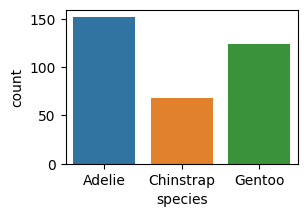

In [238]:
plt.figure(figsize = FIG_SIZE)
sns.countplot(data = penguins_df, x = "species")
plt.show()

In [239]:
penguins_df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

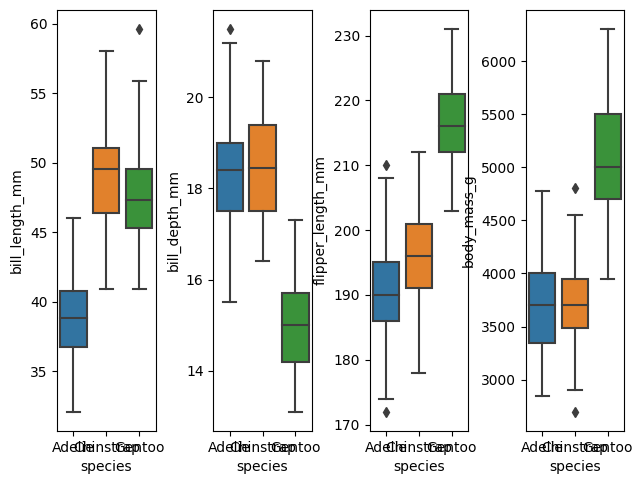

In [240]:
fig, axs = plt.subplots(ncols = 4)
fig.tight_layout()

for i, col in enumerate(penguins_df.select_dtypes(include = ["number"]).columns):
    sns.boxplot(data = penguins_df, ax = axs[i], x = "species", y = penguins_df[col])

In [241]:
penguins_df.groupby("species")[penguins_df.select_dtypes(include = ["number"]).columns].median()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.80,18.40,190.0,3700.0
Chinstrap,49.55,18.45,196.0,3700.0
Gentoo,47.30,15.00,216.0,5000.0


In [242]:
penguins_df.select_dtypes(include = ["number"]).skew()

bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

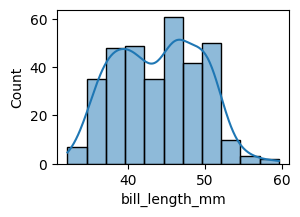

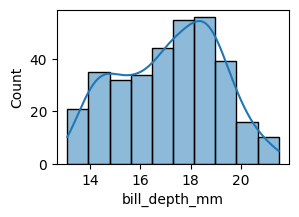

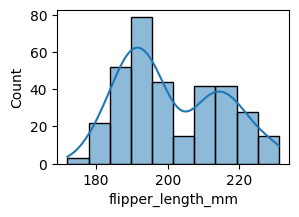

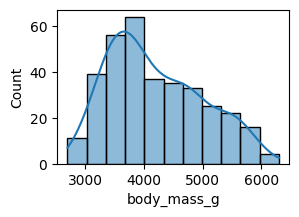

In [243]:
for col in penguins_df.select_dtypes(include = ["number"]).columns:
    plt.figure(figsize = FIG_SIZE)
    sns.histplot(data = penguins_df, x = col, kde = True)
    plt.show()

In [244]:
penguins_df.groupby(["sex", "species"]).size().unstack()

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


In [245]:
penguins_df["sex"].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

#### Handle missing values

In [246]:
numeric_features = penguins_df.select_dtypes(include = ["number"]).columns
categorical_features = penguins_df.select_dtypes(include = ["object"]).columns
print(f"Numeric Features: {numeric_features}")
print(f"Categorical Features: {categorical_features}")

Numeric Features: Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')
Categorical Features: Index(['species', 'island', 'sex'], dtype='object')


In [247]:
penguins_df[numeric_features].isnull().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [248]:
penguins_df[categorical_features].isnull().sum()

species     0
island      0
sex        11
dtype: int64

In [249]:
def fill_median(col):
    return col.fillna(col.median())

penguins_df[numeric_features] = penguins_df.groupby("species")[numeric_features].transform(fill_median)

In [250]:
penguins_df[numeric_features].isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [251]:
def fill_mode(col):
    return col.fillna(col.mode().iloc[0])

penguins_df[categorical_features] = penguins_df.groupby("species")[categorical_features].transform(fill_mode)

In [252]:
penguins_df[categorical_features].isnull().sum()

species    0
island     0
sex        0
dtype: int64

#### Data Preprocessing

In [253]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [254]:
# X = penguins_df.drop("species", axis = 1)
X = penguins_df[["bill_length_mm", "flipper_length_mm"]]
y = penguins_df["species"]

In [255]:
# categorical_features = X.select_dtypes(include = ["object"]).columns
numeric_features = X.select_dtypes(include = ["number"]).columns

In [256]:
# Steps
# - Log Transform: reduce skewness
# - Standard Scaler: normalize data
# - Encoder: encode categorical data
numerical_pipeline = Pipeline(
    steps = [
        ("log_transform", FunctionTransformer(func = np.log1p)),
        ("scaler", StandardScaler())
    ]
)
# category_pipeline = Pipeline(
#     steps = [
#         ("encoder", OneHotEncoder())
#     ]
# )

In [257]:
# ("categorical", category_pipeline, categorical_features)
col_transform = ColumnTransformer(
    transformers = [
        ("numerical", numerical_pipeline, numeric_features)
    ]
)
X = col_transform.fit_transform(X)
X.shape

(344, 2)

#### Model Training and Evaluation

In [258]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

In [259]:
penguin_model = KMeans(n_clusters = 3, random_state = 0, n_init = 10)
penguin_model.fit(X)
predicted_labels = penguin_model.predict(X)

In [260]:
pd.crosstab(y, predicted_labels)

col_0,0,1,2
species,,,
Adelie,6,144,2
Chinstrap,59,5,4
Gentoo,1,0,123


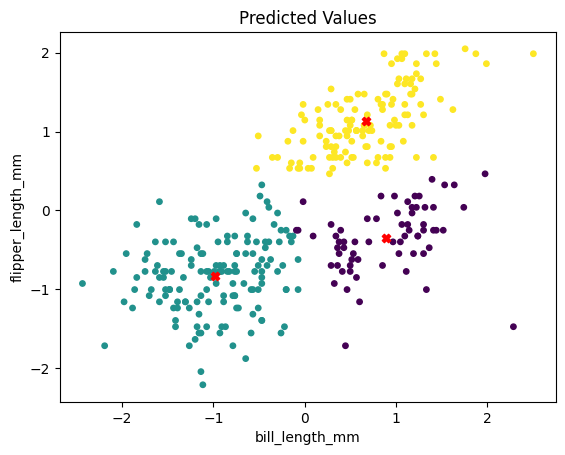

In [261]:
plt.scatter(X[:, 0], X[:, 1], c = predicted_labels, s = 15)
plt.scatter(x = penguin_model.cluster_centers_[:, 0], y = penguin_model.cluster_centers_[:, 1], marker = "X", c = "red", label = "Centroids")
plt.title("Predicted Values")
plt.xlabel("bill_length_mm")
plt.ylabel("flipper_length_mm")
plt.show()

In [262]:
ari_score = adjusted_rand_score(y, predicted_labels)
nmi_score = normalized_mutual_info_score(y, predicted_labels)

metrics_df = pd.DataFrame({
    "Metric": ["Adjusted Rand Index (ARI)", "Normalized Mutual Information (NMI)"],
    "Score": [ari_score, nmi_score]
})

metrics_df

,Metric,Score
0,Adjusted Rand Index (ARI),0.863510
1,Normalized Mutual Information (NMI),0.792557


### Description Task 4
จากข้อมูล penguin พบว่า ข้อมูลมีค่า missing บ้างบางส่วน ผมเลยทำการ imputation และนำข้อมูลไปทำ preprocessing เพื่อเตรียมข้อมูลให้เหมาะสมสำหรับการ train model จากนั้นทำการทดสอบโมเดล K-Means โดยใช้ค่า K = 3 เพราะว่า true labels ที่เป็นสายพันธ์ penguin มีแค่ 3 สายพันธ์ และ feature ที่เลือกมาคือ bill_length_mm และ flipper_length_mm เนื่องจาก feature ที่เลือกมานั้นมีการแบ่งแยกกลุ่มอย่างชัดเจน (สังเกตุจากได้จาก pairplot) จึงทำให้โมเดลที่ได้มีความแม่นยำสูง หลังจากใช้ external measure ในการวัดผล โดยใช้ค่า Adjusted Rand Index และ Normalized Mutual Information พบว่า ค่า Adjusted Rand Index มีค่าอยู่ที่ประมาณ ~ 0.86 และค่า Normalized Mutual Information มีค่าอยู่ที่ประมาณ ~ 0.79 ซึ่งค่าทั้งสองนั้นมีค่าสูงในระดับนึง จึงสามารถสรุปได้ว่า โมเดลที่ได้มีความแม่นยำสูง และมีความเหมาะสมในการแบ่งกลุ่ม แต่อาจจะมีความผิดพลาดในการแบ่งกลุ่มบ้าง